In [85]:
import seaborn as sns
import matplotlib as plt
import numpy as np

In [74]:
import pandas as pd
from pathlib import Path
path = Path('../Titanic-Dataset.csv')
df = pd.read_csv(f'{path}')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [75]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
for idx,data in enumerate(df):
  plt.figure()
  plt.title(f"{data}")
  plt.hist(df[data])

plt.show()

Dla kolumn Sex, Cabin oraz Embarked możemy zauważyć brakujące dane

In [77]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Znajdujemy najczęściej występującą wartość w kolumnie i zastępujemy nią braki

In [78]:
modes = df.mode().iloc[0] #the most common data along axis 0 - each column

df.fillna(modes,inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


(array([ 54.,  46., 354., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

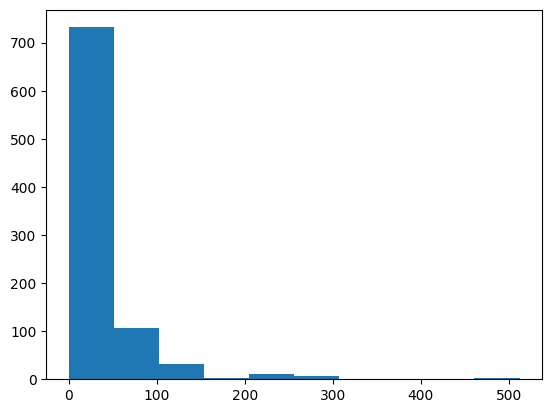

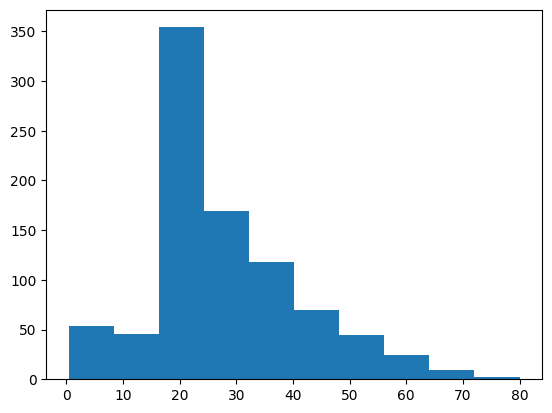

In [36]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.hist(df['Fare'])
plt.figure(2)
plt.hist(df['Age'])

Text(0.5, 1.0, 'Data after applying log function')

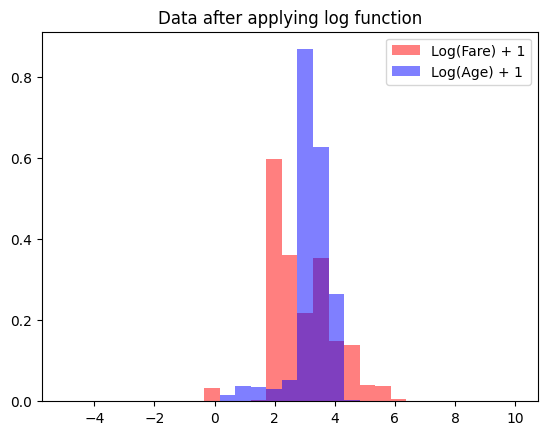

In [92]:
bins = np.linspace(-5, 10, 30)
# Plot histograms
plt.hist(np.log(df['Fare'] + 1), bins=bins, density=True, label='Log(Fare) + 1', alpha=0.5, color='red')
plt.hist(np.log(df['Age'] + 1), bins=bins, density=True, label='Log(Age) + 1', alpha=0.5, color='blue')
plt.legend(["Log(Fare) + 1","Log(Age) + 1"])
plt.title("Data after applying log function")


In [39]:
df['LogFare'] = np.log(df['Fare']+1)
df['LogAge'] = np.log(df['Fare'] + 1)
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LogFare,LogAge
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891,891,891.000000,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,NaN,NaN
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,NaN,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,691,646,NaN,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,28.566970,0.523008,0.381594,NaN,32.204208,NaN,NaN,2.962246,2.962246
std,257.353842,0.486592,0.836071,NaN,NaN,13.199572,1.102743,0.806057,NaN,49.693429,NaN,NaN,0.969048,0.969048
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN,2.187218,2.187218
50%,446.000000,0.000000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,2.737881,2.737881
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,3.465736,3.465736


In [43]:
importantCols = ['Survived','Pclass','Sex','SibSp','Parch','Embarked','LogFare','LogAge']
df_important = df[importantCols]
df_important

,Survived,Pclass,Sex,SibSp,Parch,Embarked,LogFare,LogAge
0,0,3,male,1,0,S,2.110213,2.110213
1,1,1,female,1,0,C,4.280593,4.280593
2,1,3,female,0,0,S,2.188856,2.188856
3,1,1,female,1,0,S,3.990834,3.990834
4,0,3,male,0,0,S,2.202765,2.202765
...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,S,2.639057,2.639057
887,1,1,female,0,0,S,3.433987,3.433987
888,0,3,female,1,2,S,3.196630,3.196630
889,1,1,male,0,0,C,3.433987,3.433987


In [75]:
categoricalColumns = ['Sex', 'Pclass','Embarked','Parch']

df_encoded = pd.get_dummies(df_important,columns = categoricalColumns, dtype='int')
df_encoded

,Survived,SibSp,LogFare,LogAge,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,1,2.110213,2.110213,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0
1,1,1,4.280593,4.280593,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0
2,1,0,2.188856,2.188856,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0
3,1,1,3.990834,3.990834,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0
4,0,0,2.202765,2.202765,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,2.639057,2.639057,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0
887,1,0,3.433987,3.433987,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0
888,0,1,3.196630,3.196630,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
889,1,0,3.433987,3.433987,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0


In [76]:
numeric_cols = list(set(df_important.columns) - set(categoricalColumns))
numeric_cols

['LogFare', 'LogAge', 'Survived', 'SibSp']

Normalizacja kolumn z danymi numerycznymi

In [77]:
for col in numeric_cols:
  df_encoded[col] /= max(df_encoded[col])
df_encoded.describe(include='all')

,Survived,SibSp,LogFare,LogAge,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.065376,0.474649,0.474649,0.352413,0.647587,0.242424,0.206510,0.551066,0.188552,0.086420,0.725028,0.760943,0.132435,0.089787,0.005612,0.004489,0.005612,0.001122
std,0.486592,0.137843,0.155273,0.155273,0.477990,0.477990,0.428790,0.405028,0.497665,0.391372,0.281141,0.446751,0.426747,0.339154,0.286037,0.074743,0.066890,0.074743,0.033501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.350464,0.350464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.438698,0.438698,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.125000,0.555325,0.555325,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
y = df_encoded.pop('Survived')
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [81]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(df_encoded,y, test_size = 0.2, random_state = 42)
X_train,X_valid,Y_train,Y_valid = train_test_split(X_train,Y_train,test_size=0.25,random_state = 42)

In [96]:
X = X_train.values.tolist()
Y = Y_train.values.tolist()


[0.0,
 0.5313325505056177,
 0.5313325505056177,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [115]:
X_train.to_csv("./trainX.csv")
Y_train.to_csv("./trainY.csv")
X_test.to_csv("./testX.csv")
Y_test.to_csv("./testY.csv")
X_valid.to_csv("./valX.csv")
Y_valid.to_csv("./valY.csv")


In [121]:
import zipfile
paths = [
    "./csv/testX.csv",
    "./csv/testY.csv",
    "./csv/trainY.csv",
    "./csv/trainX.csv",
    "./csv/valY.csv",
    "./csv/valX.csv"
]

zip_path = './titanic.zip'

with zipfile.ZipFile(zip_path, 'w') as zipf:
    # Loop through the list of files and add each one to the zip file
    for file in paths:
        # Add file to zip archive; the arcname is the name which with the file will be stored in the archive
        # arcname can be omitted if you want the file to have the same name/path as the file on disk
        zipf.write(file, arcname=file.split('/')[-1])  # Using split to get only the file name

print("ZIP file created successfully at:", zip_path)

ZIP file created successfully at: ./titanic.zip


csv  drive  __pycache__  sample_data  testX.csv  titanic.zip  twolayermlpv2v.py
